In [64]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [65]:
# Load test dataset
test_data = pd.read_csv('test.csv')
train_valid_data = pd.read_csv('train_valid.csv')

In [66]:
# Discretize numeric features (same as in training)
def discretize_features(data, num_bins=3):
    for col in data.columns[:-1]:  # Exclude target column
        data[col] = pd.cut(data[col], bins=num_bins, labels=range(num_bins))
    return data

In [67]:
test_data = discretize_features(test_data)
train_valid_data = discretize_features(train_valid_data)

In [68]:
with open('probabilities.txt', 'r') as f:
    lines = f.readlines()
    priors = ast.literal_eval(lines[1])
    likelihoods = ast.literal_eval(lines[3])

In [69]:
# print(priors)
# print(likelihoods)

In [70]:
# Make predictions using Naive Bayes
def predict(row):
    class_probs = {}
    for cls in priors:
        class_probs[cls] = priors[cls]
        for feature in row.index[:-1]:  # Exclude target column
            class_probs[cls] *= likelihoods[feature][row[feature]][cls]
    return max(class_probs, key=class_probs.get)

In [71]:
test_X = test_data.iloc[:, :-1]  # Features
test_y = test_data.iloc[:, -1]   # Actual labels

predicted_y = test_data.apply(predict, axis=1)
# predicted_y = naive_bayes_predict(test_X)

# Find misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(test_y, predicted_y)) if true != pred]
misclassified_samples = test_data.iloc[misclassified_indices]
misclassified_samples['Predicted Label'] = [predicted_y[i] for i in misclassified_indices]

# Output the misclassified samples
print("Misclassified samples:")
print(misclassified_samples[['Predicted Label', test_y.name]])

Misclassified samples:
   Predicted Label           target
15  Iris-virginica  Iris-versicolor


C:\Users\Hemanth\AppData\Local\Temp\ipykernel_9480\2257461102.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['Predicted Label'] = [predicted_y[i] for i in misclassified_indices]


In [72]:
# Apply prediction
test_data['predicted'] = test_data.apply(predict, axis=1)
train_valid_data['predicted'] = train_valid_data.apply(predict, axis=1)

In [73]:
 
y_valid_true = train_valid_data['target']
y_valid_pred = train_valid_data['predicted']

accuracy = accuracy_score(y_valid_true, y_valid_pred)
precision = precision_score(y_valid_true, y_valid_pred, average='macro')
recall = recall_score(y_valid_true, y_valid_pred, average='macro')
conf_matrix = confusion_matrix(y_valid_true, y_valid_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation Confusion Matrix:\n{conf_matrix}")

Validation Accuracy: 0.7142857142857143
Validation Precision: 0.8333333333333334
Validation Recall: 0.7777777777777777
Validation Confusion Matrix:
[[2 0 0]
 [0 1 2]
 [0 0 2]]


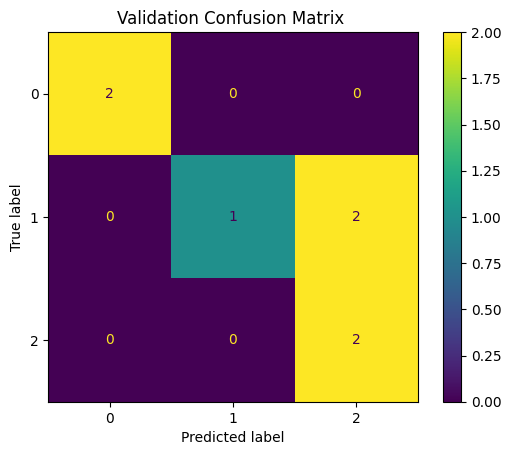

In [74]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Validation Confusion Matrix " )
plt.show()

In [75]:
# Calculate performance metrics on test test data

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test Confusion Matrix:\n{conf_matrix}")

Test Accuracy: 0.9736842105263158
Test Precision: 0.9743589743589745
Test Recall: 0.9696969696969697
Test Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


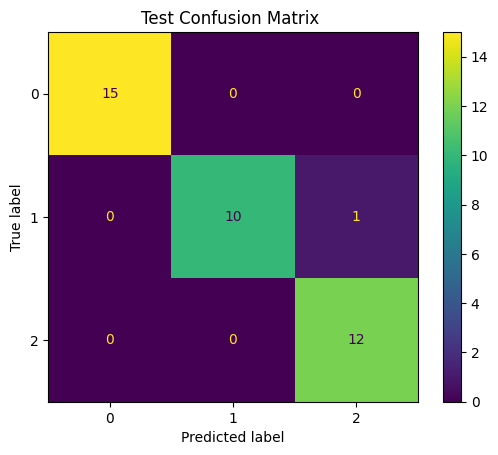

In [76]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Test Confusion Matrix " )
plt.show()